In [1]:
import uproot
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def smart_clip(np_array, bins):
    clip_low = 0.5 * (bins[0] + bins[1])
    clip_high = 0.5 * (bins[-2] + bins[-1])
    return np.clip(np_array, clip_low, clip_high)

In [3]:
with uproot.open("sm_vbs_vh_flat.root") as f:
    sm_df = f.get("tree").arrays(library="pd")
    
with uproot.open("bsm_vbs_vh_flat.root") as f:
    bsm_df = f.get("tree").arrays(library="pd")

In [4]:
sm_df

,H_pt,H_eta,H_phi,W_pt,W_eta,W_phi,W_sign,W_pol,M_WH,M_jj,deta_jj
0,130.725555,0.178609,1.403863,18.008446,-1.927848,-1.560732,1,-1,258.618713,2994.475342,8.230290
1,72.409683,-1.068286,-1.303791,142.659012,-2.332175,0.994656,1,-1,396.029755,1470.663940,6.073298
2,89.357491,-2.379655,-1.048876,88.240166,3.153385,2.622477,1,-1,1437.271118,2682.294922,9.209255
3,81.317169,1.187198,-2.937124,96.706673,-0.964024,0.908986,1,1,352.140503,1992.493530,6.240210
4,85.269859,1.354480,1.285905,90.676117,-2.427304,-1.533884,-1,-1,648.265015,763.400330,5.943116
...,...,...,...,...,...,...,...,...,...,...,...
9995,142.149155,0.346713,-2.861176,100.401863,1.159456,-2.377518,-1,-1,240.906174,2464.219727,6.036813
9996,148.113449,2.435225,2.328235,97.243370,-0.520215,0.303669,-1,1,599.312500,1181.055420,5.606647
9997,73.614464,-1.038212,-0.889815,55.115143,-3.345140,1.474822,-1,0,394.092712,1304.652588,5.654776
9998,79.074196,3.581402,3.124953,83.536667,-0.062776,-0.612521,1,-1,615.772156,3526.729004,8.980013


In [5]:
bsm_df

,H_pt,H_eta,H_phi,W_pt,W_eta,W_phi,W_sign,W_pol,M_WH,M_jj,deta_jj
0,505.855286,-0.179584,-0.572943,408.459839,0.850542,2.661104,1,0,1053.146973,3948.544434,7.942479
1,683.338379,-2.012733,1.571146,755.067078,-0.687504,-1.606735,-1,0,1776.397827,1284.961182,6.649674
2,263.154968,1.171473,0.255401,423.557465,-0.322563,-2.480233,-1,0,877.565918,863.913757,3.891659
3,831.335083,-0.098657,-1.045038,765.875977,-0.080942,1.983017,1,0,1606.945557,1561.412964,6.624545
4,357.047821,-0.758119,2.112994,338.942749,-1.041222,-0.908925,1,0,733.328186,778.135986,5.855340
...,...,...,...,...,...,...,...,...,...,...,...
9995,441.870392,0.443947,-0.038431,515.853699,-1.324567,3.124361,1,0,1374.386719,1521.997437,6.423909
9996,104.618668,-0.429738,-1.707860,184.726669,-1.506172,0.424146,1,0,395.656982,799.681885,3.673652
9997,384.295685,-0.542127,-2.655235,510.856049,1.709318,0.124660,1,0,1525.734253,3000.605469,6.760788
9998,252.446289,-1.622833,1.686150,110.368629,1.938774,-1.542908,1,0,1039.169067,2678.720947,7.330162


In [6]:
np.sum(bsm_df.H_pt > 400)/np.sum(bsm_df.H_pt > 0)

0.2982

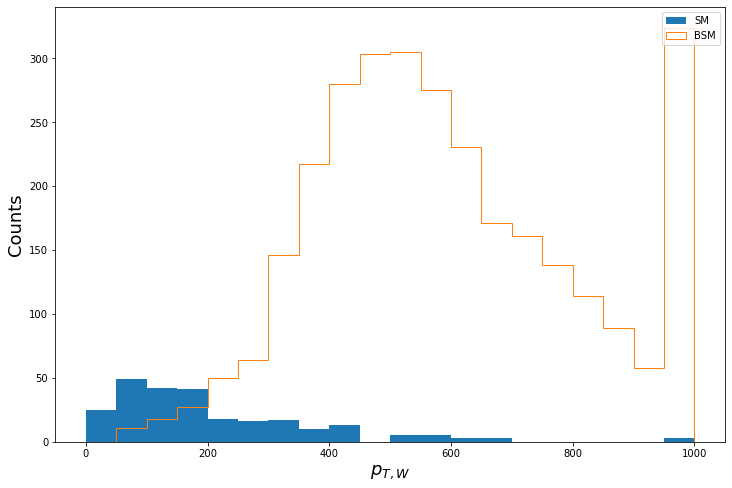

In [7]:
fig, axes = plt.subplots(figsize=(12, 8))
bins = np.linspace(0, 1000, 21)

axes.hist(
    smart_clip(sm_df[sm_df.H_pt > 400].W_pt, bins), 
    bins=bins,
    label="SM"
);
axes.hist(
    smart_clip(bsm_df[bsm_df.H_pt > 400].W_pt, bins), 
    bins=bins, 
    histtype="step",
    label="BSM"
);
axes.set_xlabel("$p_{T,W}$", size=18);
axes.set_ylabel("Counts", size=18);
axes.legend();

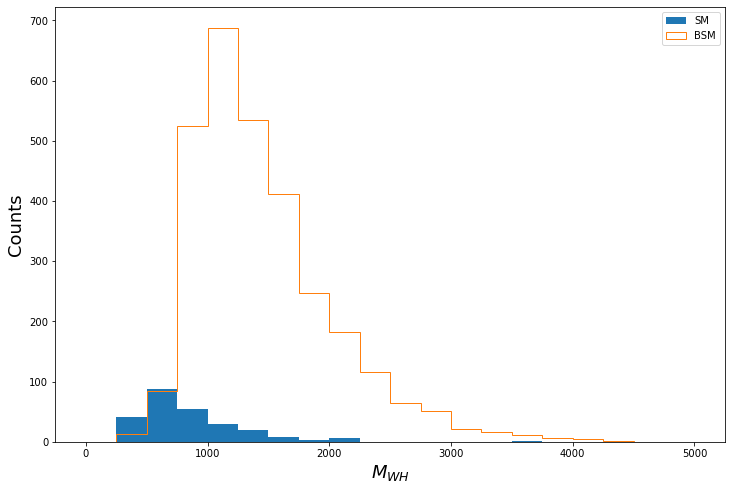

In [11]:
fig, axes = plt.subplots(figsize=(12, 8))
bins = np.linspace(0, 5000, 21)

axes.hist(
    smart_clip(sm_df[sm_df.H_pt > 400].M_WH, bins), 
    bins=bins,
    label="SM"
);
axes.hist(
    smart_clip(bsm_df[bsm_df.H_pt > 400].M_WH, bins), 
    bins=bins, 
    histtype="step",
    label="BSM"
);
axes.set_xlabel("$M_{WH}$", size=18);
axes.set_ylabel("Counts", size=18);
axes.legend();

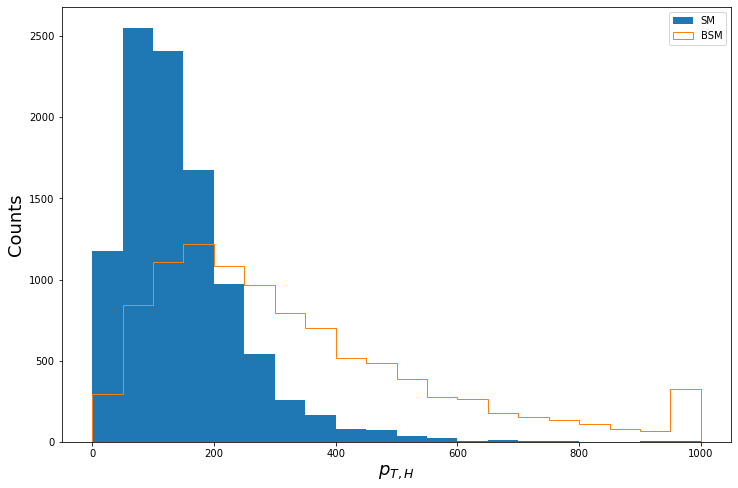

In [6]:
fig, axes = plt.subplots(figsize=(12, 8))
bins = np.linspace(0, 1000, 21)

axes.hist(
    smart_clip(sm_df.H_pt, bins), 
    bins=bins,
    label="SM"
);
axes.hist(
    smart_clip(bsm_df.H_pt, bins), 
    bins=bins, 
    histtype="step",
    label="BSM"
);
axes.set_xlabel("$p_{T,H}$", size=18);
axes.set_ylabel("Counts", size=18);
axes.legend();

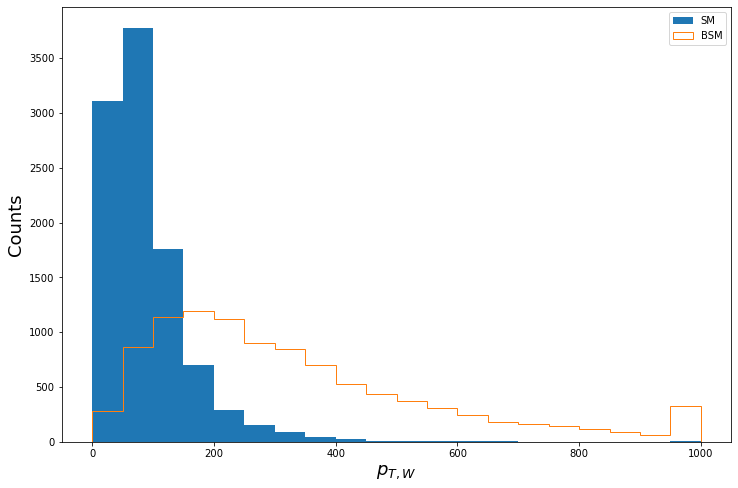

In [7]:
fig, axes = plt.subplots(figsize=(12, 8))
bins = np.linspace(0, 1000, 21)

axes.hist(
    smart_clip(sm_df.W_pt, bins), 
    bins=bins,
    label="SM"
);
axes.hist(
    smart_clip(bsm_df.W_pt, bins), 
    bins=bins, 
    histtype="step",
    label="BSM"
);
axes.set_xlabel("$p_{T,W}$", size=18);
axes.set_ylabel("Counts", size=18);
axes.legend();

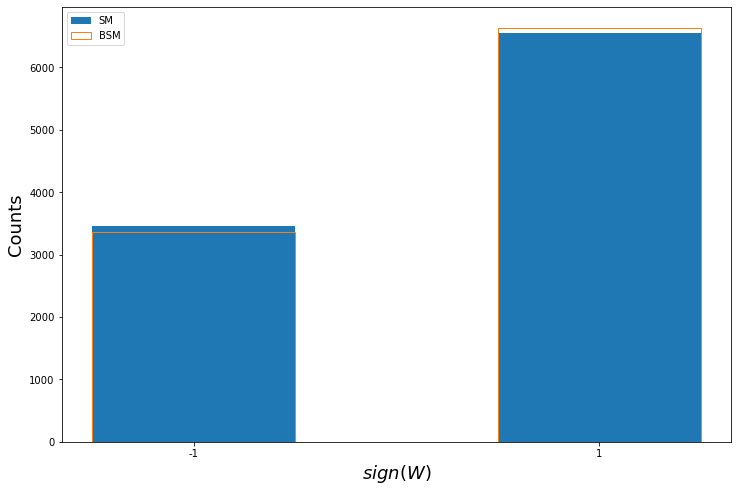

In [23]:
fig, axes = plt.subplots(figsize=(12, 8))

axes.hist(
    np.sign(sm_df.W_sign),
    bins=[-1, 0, 1, 2],
    label="SM"
);
axes.hist(
    np.sign(bsm_df.W_sign),
    bins=[-1, 0, 1, 2],
    histtype="step",
    label="BSM"
);
axes.set_xlabel("$sign(W)$", size=18);
axes.set_ylabel("Counts", size=18);
axes.set_xticks([-0.5, 1.5]);
axes.set_xticklabels([-1, 1]);
axes.legend();

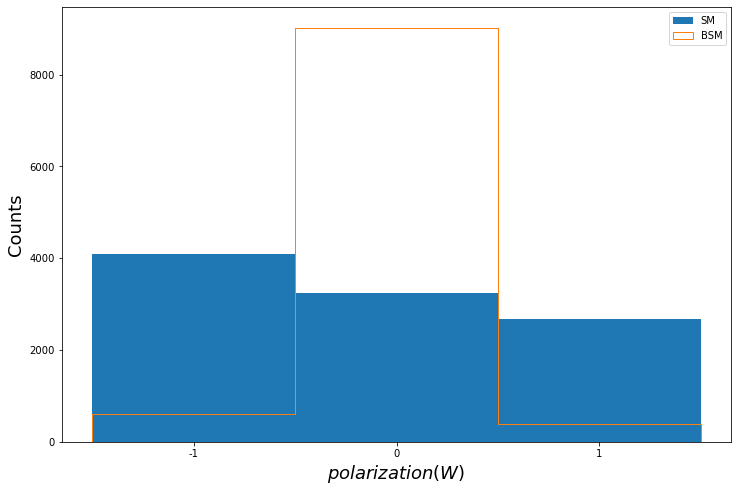

In [25]:
fig, axes = plt.subplots(figsize=(12, 8))

axes.hist(
    np.sign(sm_df.W_pol),
    bins=[-1, 0, 1, 2],
    label="SM"
);
axes.hist(
    np.sign(bsm_df.W_pol),
    bins=[-1, 0, 1, 2],
    histtype="step",
    label="BSM"
);
axes.set_xlabel("$polarization(W)$", size=18);
axes.set_ylabel("Counts", size=18);
axes.set_xticks([-0.5, 0.5, 1.5]);
axes.set_xticklabels([-1, 0, 1]);
axes.legend();

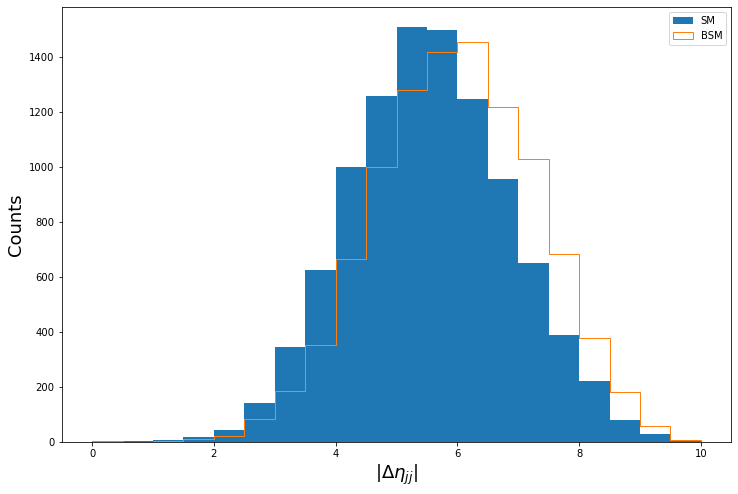

In [10]:
fig, axes = plt.subplots(figsize=(12, 8))
bins = np.linspace(0, 10, 21)

axes.hist(
    smart_clip(sm_df.deta_jj, bins), 
    bins=bins,
    label="SM"
);
axes.hist(
    smart_clip(bsm_df.deta_jj, bins), 
    bins=bins, 
    histtype="step",
    label="BSM"
);
axes.set_xlabel("$|\Delta\eta_{jj}|$", size=18);
axes.set_ylabel("Counts", size=18);
axes.legend();

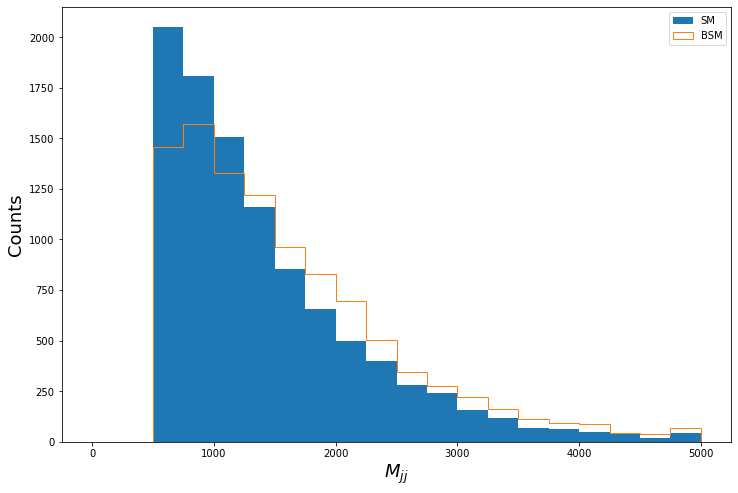

In [11]:
fig, axes = plt.subplots(figsize=(12, 8))
bins = np.linspace(0, 5000, 21)

axes.hist(
    smart_clip(sm_df.M_jj, bins), 
    bins=bins,
    label="SM"
);
axes.hist(
    smart_clip(bsm_df.M_jj, bins), 
    bins=bins, 
    histtype="step",
    label="BSM"
);
axes.set_xlabel("$M_{jj}$", size=18);
axes.set_ylabel("Counts", size=18);
axes.legend();

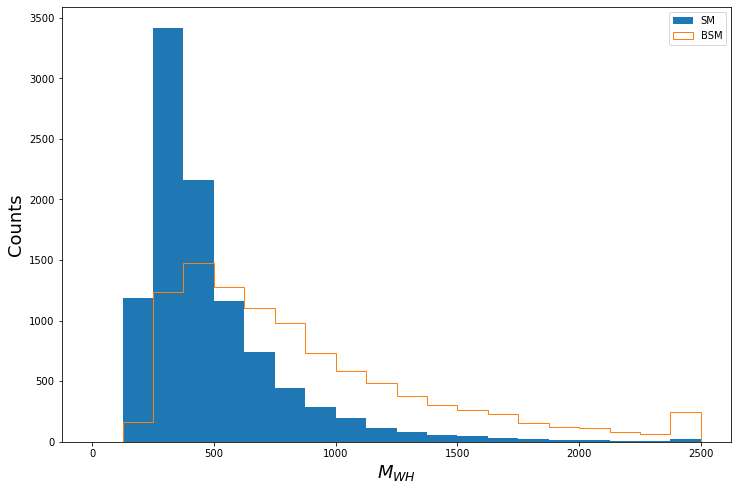

In [12]:
fig, axes = plt.subplots(figsize=(12, 8))
bins = np.linspace(0, 2500, 21)

axes.hist(
    smart_clip(sm_df.M_WH, bins), 
    bins=bins,
    label="SM"
);
axes.hist(
    smart_clip(bsm_df.M_WH, bins), 
    bins=bins, 
    histtype="step",
    label="BSM"
);
axes.set_xlabel("$M_{WH}$", size=18);
axes.set_ylabel("Counts", size=18);
axes.legend();